In [42]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa

def plot_signals(signals):
    fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                             sharey=True, figsize=(10,20))#figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(4):
        for y in range(2):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fft(fft):
    fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(4):
        for y in range(2):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(4):
        for y in range(2):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(4):
        for y in range(2):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1


In [2]:
os.chdir('..')

In [3]:
MAIN_PATH = 'Processed/RAVDESSspeech/'
df = pd.read_csv(MAIN_PATH + 'ravdessSpeech.csv')
df.set_index('Filename', inplace=True)

In [4]:
df

,FilePath,Modality,VocalChannel,Emotion,EmotionalIntensity,Statement,Repitition,Actor,Gender
Filename,,,,,,,,,
03-01-01-01-01-02-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Neutral,1,1,2,5,Male
03-01-04-02-02-01-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Sad,2,2,1,5,Male
03-01-04-01-01-02-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Sad,1,1,2,5,Male
03-01-03-02-01-02-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Happy,2,1,2,5,Male
03-01-04-02-01-01-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Sad,2,1,1,5,Male
...,...,...,...,...,...,...,...,...,...
03-01-06-02-02-01-04.wav,Datasets/Audio_Speech_Actors_01-24/Actor_04/03...,3,1,Fearful,2,2,1,4,Female
03-01-01-01-02-02-04.wav,Datasets/Audio_Speech_Actors_01-24/Actor_04/03...,3,1,Neutral,1,2,2,4,Female
03-01-06-01-02-02-04.wav,Datasets/Audio_Speech_Actors_01-24/Actor_04/03...,3,1,Fearful,1,2,2,4,Female


In [5]:
for f in df.index:
    rate, signal = wavfile.read(MAIN_PATH + 'clean/' + f)
    df.at[f, 'length'] = signal.shape[0]/rate # length of signal in seconds
df

,FilePath,Modality,VocalChannel,Emotion,EmotionalIntensity,Statement,Repitition,Actor,Gender,length
Filename,,,,,,,,,,
03-01-01-01-01-02-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Neutral,1,1,2,5,Male,1.597625
03-01-04-02-02-01-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Sad,2,2,1,5,Male,1.174125
03-01-04-01-01-02-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Sad,1,1,2,5,Male,1.417625
03-01-03-02-01-02-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Happy,2,1,2,5,Male,2.074375
03-01-04-02-01-01-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Sad,2,1,1,5,Male,1.447750
...,...,...,...,...,...,...,...,...,...,...
03-01-06-02-02-01-04.wav,Datasets/Audio_Speech_Actors_01-24/Actor_04/03...,3,1,Fearful,2,2,1,4,Female,1.756000
03-01-01-01-02-02-04.wav,Datasets/Audio_Speech_Actors_01-24/Actor_04/03...,3,1,Neutral,1,2,2,4,Female,1.241750
03-01-06-01-02-02-04.wav,Datasets/Audio_Speech_Actors_01-24/Actor_04/03...,3,1,Fearful,1,2,2,4,Female,1.496375


In [6]:
classes = list(np.unique(df.Emotion))
classes

['Angry', 'Calm', 'Disgust', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised']

In [7]:
class_dist = df.groupby(['Emotion'])['length'].mean()
class_dist

Emotion
Angry        2.098734
Calm         1.796068
Disgust      2.032028
Fearful      1.954391
Happy        1.847820
Neutral      1.549719
Sad          1.790979
Surprised    1.623700
Name: length, dtype: float64

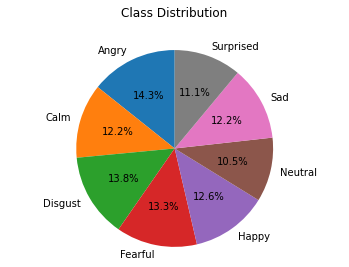

In [8]:
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',
      shadow=False, startangle=90) # autopct='%1.1f%%' make 1 decimal point of accuracy
ax.axis('equal')
#plt.show
df.reset_index(inplace=True)

In [9]:
df

,Filename,FilePath,Modality,VocalChannel,Emotion,EmotionalIntensity,Statement,Repitition,Actor,Gender,length
0,03-01-01-01-01-02-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Neutral,1,1,2,5,Male,1.597625
1,03-01-04-02-02-01-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Sad,2,2,1,5,Male,1.174125
2,03-01-04-01-01-02-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Sad,1,1,2,5,Male,1.417625
3,03-01-03-02-01-02-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Happy,2,1,2,5,Male,2.074375
4,03-01-04-02-01-01-05.wav,Datasets/Audio_Speech_Actors_01-24/Actor_05/03...,3,1,Sad,2,1,1,5,Male,1.447750
...,...,...,...,...,...,...,...,...,...,...,...
1435,03-01-06-02-02-01-04.wav,Datasets/Audio_Speech_Actors_01-24/Actor_04/03...,3,1,Fearful,2,2,1,4,Female,1.756000
1436,03-01-01-01-02-02-04.wav,Datasets/Audio_Speech_Actors_01-24/Actor_04/03...,3,1,Neutral,1,2,2,4,Female,1.241750
1437,03-01-06-01-02-02-04.wav,Datasets/Audio_Speech_Actors_01-24/Actor_04/03...,3,1,Fearful,1,2,2,4,Female,1.496375
1438,03-01-07-02-02-02-04.wav,Datasets/Audio_Speech_Actors_01-24/Actor_04/03...,3,1,Disgust,2,2,2,4,Female,2.046375


In [10]:
def calculate_fft(signal, rate):
    """Calculate Fast Fourier Transform"""
    n = len(signal)
    frequency = np.fft.rfftfreq(n, d=1/rate)
    # Magnitude also respresented as Y and signal as y
    # The calcluated fft returns a complex number (real part and imaginary) so be take the abs to get magnitude
    # Divide by n to normalize magnitude
    magnitude = abs(np.fft.rfft(signal)/n) 
    return (magnitude, frequency)


def my_logfbank(signal, rate, nfilt, nfft):
    # nfft is the window size, usually 25ms, so sampling_rate*0.025. nfft will be padded with 0 to match a power of 2
    bank = logfbank(signal, rate, nfilt=nfilt, nfft=nfft).T # transpose it
    return bank

In [11]:
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [12]:
signals = {}
fft = {}
fbank = {}
mfccs = {}

In [13]:
#df[df.Emotion == c][df.Statement == 1]

In [14]:
list(np.unique(df.Statement))[0]

1

In [27]:
for c in classes:
    wav_file = df[df.Emotion == c][df.Statement == list(np.unique(df.Statement))[1]].iloc[0,1] # get a filepath
    print(wav_file)
    signal, rate = librosa.load(wav_file, sr=16000)#sr=44100)
    mask = envelope(signal, rate, 0.0005)
    
    #Using this mask will remove dead space
    signal = signal[mask]
    
    signals[c] = signal
    fft[c] = calculate_fft(signal, rate)
    
    # For both, nfft=1103 because rate*0.025=1102.5 so round up. 
    bank = my_logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T  # for 1 second, why?
    fbank[c] = bank
    mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=1103).T ## for 1 second, why? also transpose
    mfccs[c] = mel

/home/john/.virtualenvs/EmotionAudio/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Datasets/Audio_Speech_Actors_01-24/Actor_05/03-01-05-01-02-01-05.wav
Datasets/Audio_Speech_Actors_01-24/Actor_05/03-01-02-02-02-01-05.wav
Datasets/Audio_Speech_Actors_01-24/Actor_05/03-01-07-01-02-02-05.wav
Datasets/Audio_Speech_Actors_01-24/Actor_05/03-01-06-01-02-01-05.wav
Datasets/Audio_Speech_Actors_01-24/Actor_05/03-01-03-01-02-01-05.wav
Datasets/Audio_Speech_Actors_01-24/Actor_05/03-01-01-01-02-02-05.wav
Datasets/Audio_Speech_Actors_01-24/Actor_05/03-01-04-02-02-01-05.wav
Datasets/Audio_Speech_Actors_01-24/Actor_05/03-01-08-01-02-01-05.wav


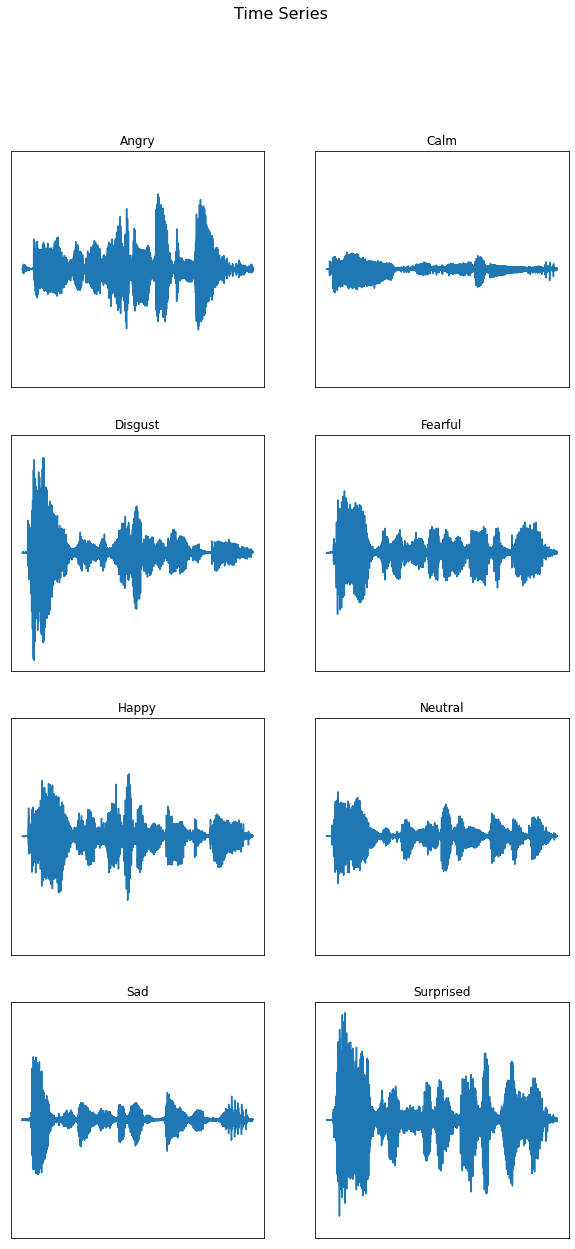

In [43]:
plot_signals(signals)

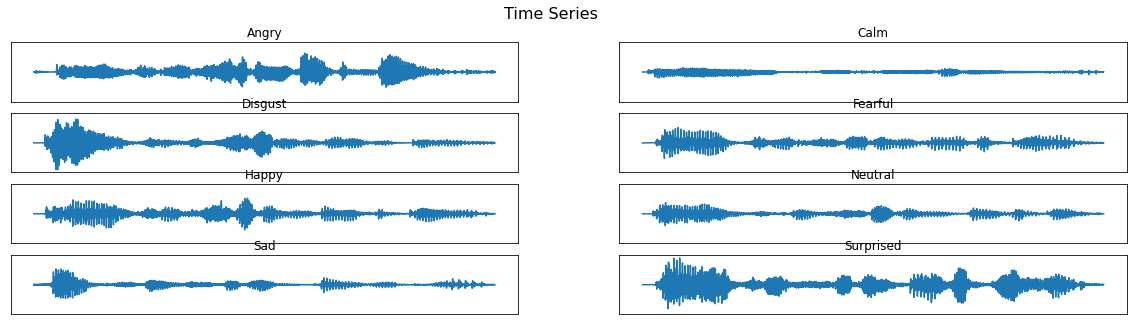

In [36]:
plot_signals(signals)

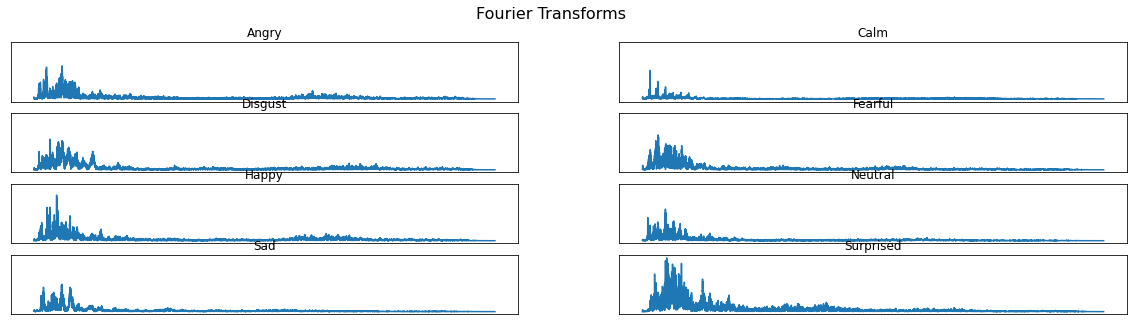

In [37]:
plot_fft(fft)

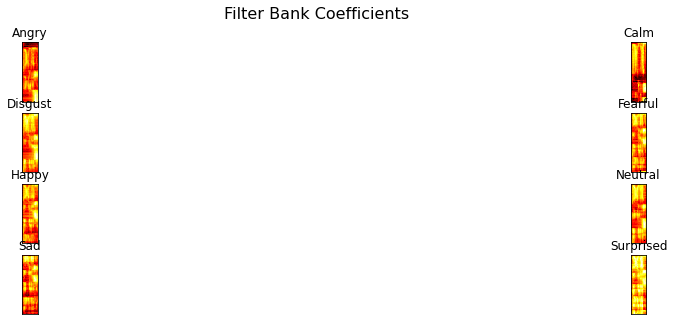

In [38]:
plot_fbank(fbank)

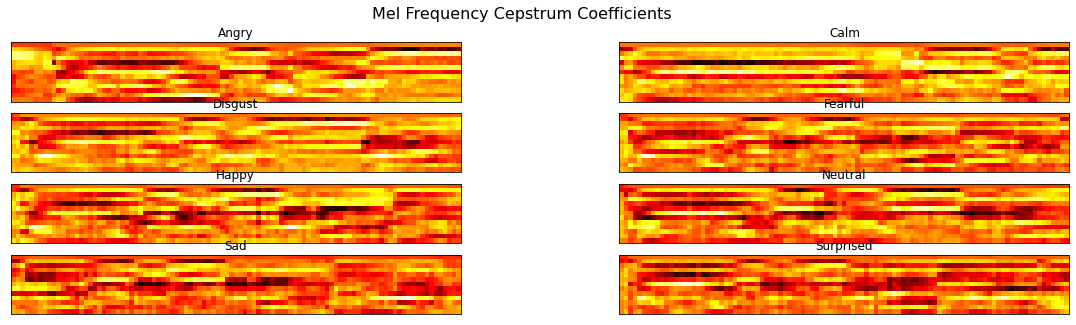

In [39]:
plot_mfccs(mfccs)

In [33]:
if len(os.listdir('clean')) == 0:
    for f in tqdm(df.fname):
        signal, rate = librosa.load('wavfiles/' + f, sr=16000) # downsampling to 16khz
        mask = envelope(signal, rate, 0.0005)
        wavfile.write(filename='clean/' + f, rate=rate, data=signal[mask])

FileNotFoundError: [Errno 2] No such file or directory: 'clean'